**Mamdani**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
# Read Dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Columns where 0 means missing value
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in columns:
    # Find the median of the column ignoring zeros
    median = df[df[col] != 0][col].median()
    # Replace zeros with the median value
    df[col] = df[col].replace(0, median)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,125,33.6,0.627,50,1
1,1,85,66,29,125,26.6,0.351,31,0
2,8,183,64,29,125,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
columns = ['Glucose', 'BMI', 'BloodPressure']

for col in columns:
    print(f"{col} Max: {df[col].max()}")
    print('---')

Glucose Max: 199
---
BMI Max: 67.1
---
BloodPressure Max: 122
---


In [5]:
# Define fuzzy inputs
glucose = ctrl.Antecedent(np.arange(0, 200, 1), 'glucose')
bmi = ctrl.Antecedent(np.arange(0.0, 68.1, 0.1), 'bmi')
bp = ctrl.Antecedent(np.arange(0, 123, 1), 'bloodpressure')

In [6]:
# Define fuzzy output
risk = ctrl.Consequent(np.arange(0, 101, 1), 'risk')

In [7]:
# Membership functions for glucose
glucose['low'] = fuzz.trimf(glucose.universe, [0, 0, 90])
glucose['medium'] = fuzz.trimf(glucose.universe, [60, 100, 140])
glucose['high'] = fuzz.trimf(glucose.universe, [120, 199, 199])

# Membership functions for BMI
bmi['low'] = fuzz.trimf(bmi.universe, [0.0, 0.0, 21.0])
bmi['medium'] = fuzz.trimf(bmi.universe, [18.0, 30.0, 42.0])
bmi['high'] = fuzz.trimf(bmi.universe, [36.0, 67.1, 67.1])

# Membership functions for blood pressure
bp['low'] = fuzz.trimf(bp.universe, [0, 0, 70])
bp['medium'] = fuzz.trimf(bp.universe, [60, 80, 100])
bp['high'] = fuzz.trimf(bp.universe, [90, 122, 122])

# Membership functions for risk
risk['low'] = fuzz.trimf(risk.universe, [0, 0, 40])
risk['medium'] = fuzz.trimf(risk.universe, [30, 50, 70])
risk['high'] = fuzz.trimf(risk.universe, [60, 100, 100])

In [8]:
# 27 Manual Fuzzy Rules
rules = [
    ctrl.Rule(glucose['low'] & bmi['low'] & bp['low'], risk['low']),
    ctrl.Rule(glucose['low'] & bmi['low'] & bp['medium'], risk['low']),
    ctrl.Rule(glucose['low'] & bmi['low'] & bp['high'], risk['medium']),

    ctrl.Rule(glucose['low'] & bmi['medium'] & bp['low'], risk['low']),
    ctrl.Rule(glucose['low'] & bmi['medium'] & bp['medium'], risk['medium']),
    ctrl.Rule(glucose['low'] & bmi['medium'] & bp['high'], risk['medium']),

    ctrl.Rule(glucose['low'] & bmi['high'] & bp['low'], risk['medium']),
    ctrl.Rule(glucose['low'] & bmi['high'] & bp['medium'], risk['medium']),
    ctrl.Rule(glucose['low'] & bmi['high'] & bp['high'], risk['high']),

    ctrl.Rule(glucose['medium'] & bmi['low'] & bp['low'], risk['low']),
    ctrl.Rule(glucose['medium'] & bmi['low'] & bp['medium'], risk['medium']),
    ctrl.Rule(glucose['medium'] & bmi['low'] & bp['high'], risk['medium']),

    ctrl.Rule(glucose['medium'] & bmi['medium'] & bp['low'], risk['medium']),
    ctrl.Rule(glucose['medium'] & bmi['medium'] & bp['medium'], risk['medium']),
    ctrl.Rule(glucose['medium'] & bmi['medium'] & bp['high'], risk['high']),

    ctrl.Rule(glucose['medium'] & bmi['high'] & bp['low'], risk['medium']),
    ctrl.Rule(glucose['medium'] & bmi['high'] & bp['medium'], risk['high']),
    ctrl.Rule(glucose['medium'] & bmi['high'] & bp['high'], risk['high']),

    ctrl.Rule(glucose['high'] & bmi['low'] & bp['low'], risk['medium']),
    ctrl.Rule(glucose['high'] & bmi['low'] & bp['medium'], risk['medium']),
    ctrl.Rule(glucose['high'] & bmi['low'] & bp['high'], risk['high']),

    ctrl.Rule(glucose['high'] & bmi['medium'] & bp['low'], risk['medium']),
    ctrl.Rule(glucose['high'] & bmi['medium'] & bp['medium'], risk['high']),
    ctrl.Rule(glucose['high'] & bmi['medium'] & bp['high'], risk['high']),

    ctrl.Rule(glucose['high'] & bmi['high'] & bp['low'], risk['high']),
    ctrl.Rule(glucose['high'] & bmi['high'] & bp['medium'], risk['high']),
    ctrl.Rule(glucose['high'] & bmi['high'] & bp['high'], risk['high']),
]

/Users/apple/Library/Python/3.9/lib/python/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


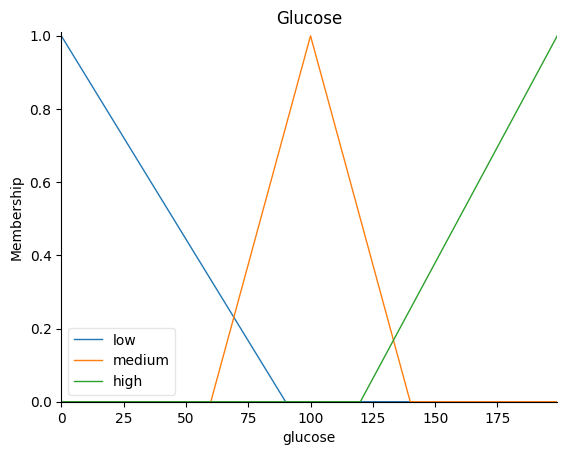

In [9]:
# Glucose membership plot
glucose.view()
plt.title("Glucose")
plt.show()

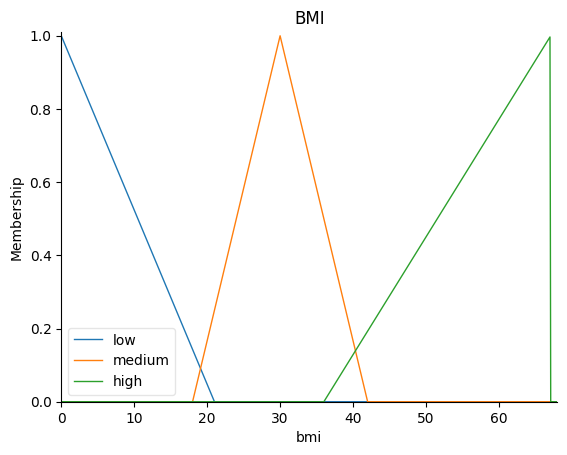

In [10]:
# BMI membership plot
bmi.view()
plt.title("BMI")
plt.show()

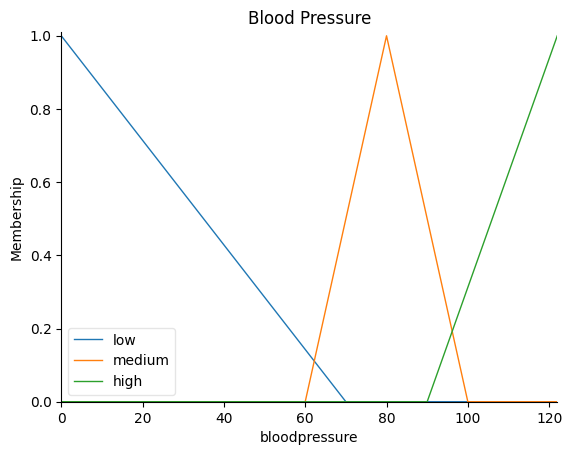

In [11]:
# Blood Pressure membership plot
bp.view()
plt.title("Blood Pressure")
plt.show()

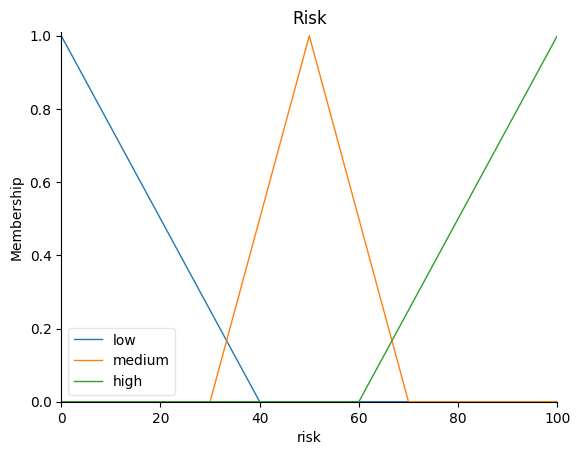

In [12]:
# Risk output membership plot
risk.view()
plt.title("Risk")
plt.show()

In [13]:
# Create control system and simulation
mamdani_ctrl = ctrl.ControlSystem(rules)
mamdani_sim = ctrl.ControlSystemSimulation(mamdani_ctrl)

Risk output: 82.9320987654321


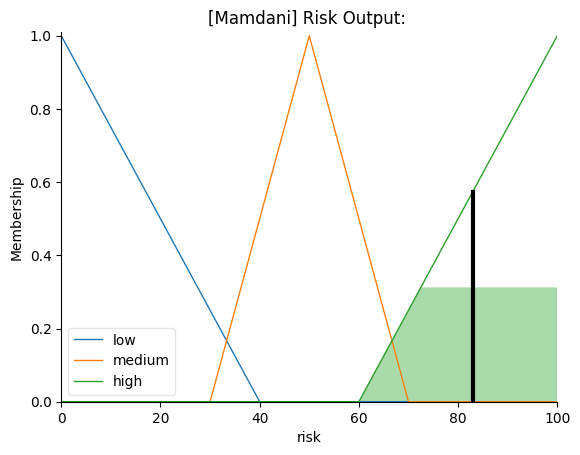

In [14]:
# Input from user 
g_val = float(input("Enter glucose (0–199): "))
bmi_val = float(input("Enter BMI (0.0–67.1): "))
bp_val = float(input("Enter blood pressure (0–122): "))

# Set inputs
mamdani_sim.input['glucose'] = g_val
mamdani_sim.input['bmi'] = bmi_val
mamdani_sim.input['bloodpressure'] = bp_val

# Compute output
mamdani_sim.compute()

# Show result
print("Risk output:", mamdani_sim.output['risk'])
risk.view(sim=mamdani_sim)
plt.title("[Mamdani] Risk Output: ")
plt.show()

**Sugeno**

In [15]:
# Glucose fuzzification
def fuzzify_glucose(x):
    return {
        'low': max(min((100 - x) / 100, 1), 0),
        'medium': max(min((x - 70) / 50, (170 - x) / 50), 0),
        'high': max(min((x - 120) / 79, 1), 0)
    }

# BMI fuzzification
def fuzzify_bmi(x):
    return {
        'low': max(min((21 - x) / 21, 1), 0),
        'medium': max(min((x - 18) / 12, (42 - x) / 12), 0),
        'high': max(min((x - 36) / 31.1, 1), 0)
    }

# Blood pressure fuzzification
def fuzzify_bp(x):
    return {
        'low': max(min((70 - x) / 70, 1), 0),
        'medium': max(min((x - 60) / 20, (100 - x) / 20), 0),
        'high': max(min((x - 90) / 32, 1), 0)
    }

In [16]:
# Output constants for Sugeno method
risk_values = {
    'low': 20,
    'medium': 50,
    'high': 90
}

In [17]:
def evaluate_rules(glucose_val, bmi_val, bp_val):
    g = fuzzify_glucose(glucose_val)
    b = fuzzify_bmi(bmi_val)
    p = fuzzify_bp(bp_val)

    rule_base = [
        (('low', 'low', 'low'), 'low'),
        (('low', 'low', 'medium'), 'low'),
        (('low', 'low', 'high'), 'medium'),
        (('low', 'medium', 'low'), 'low'),
        (('low', 'medium', 'medium'), 'medium'),
        (('low', 'medium', 'high'), 'medium'),
        (('low', 'high', 'low'), 'medium'),
        (('low', 'high', 'medium'), 'medium'),
        (('low', 'high', 'high'), 'high'),
        (('medium', 'low', 'low'), 'low'),
        (('medium', 'low', 'medium'), 'medium'),
        (('medium', 'low', 'high'), 'medium'),
        (('medium', 'medium', 'low'), 'medium'),
        (('medium', 'medium', 'medium'), 'medium'),
        (('medium', 'medium', 'high'), 'high'),
        (('medium', 'high', 'low'), 'medium'),
        (('medium', 'high', 'medium'), 'high'),
        (('medium', 'high', 'high'), 'high'),
        (('high', 'low', 'low'), 'medium'),
        (('high', 'low', 'medium'), 'medium'),
        (('high', 'low', 'high'), 'high'),
        (('high', 'medium', 'low'), 'medium'),
        (('high', 'medium', 'medium'), 'high'),
        (('high', 'medium', 'high'), 'high'),
        (('high', 'high', 'low'), 'high'),
        (('high', 'high', 'medium'), 'high'),
        (('high', 'high', 'high'), 'high')
    ]

    numerator = 0
    denominator = 0

    for (gl, bm, bp), risk_label in rule_base:
        weight = g[gl] * b[bm] * p[bp]
        value = risk_values[risk_label]

        numerator += weight * value
        denominator += weight

    return numerator / denominator if denominator != 0 else 0

In [18]:
# Convert numeric score to risk category
def classify_risk(score):
    if score < 40:
        return 'Low'
    elif score < 75:
        return 'Medium'
    else:
        return 'High'

# Input with validation to ensure proper range and numeric input
def input_with_validation(prompt, min_val, max_val):
    while True:
        try:
            val = float(input(prompt))
            if val < min_val or val > max_val:
                print(f"Input must be between {min_val} and {max_val}. Try again.")
            else:
                return val
        except ValueError:
            print("Input must be a number. Try again.")

# Main program starts here
glucose_input = input_with_validation("Enter Glucose level (0 - 199): ", 0, 199)
bmi_input = input_with_validation("Enter BMI (0.0 - 67.1): ", 0.0, 67.1)
bp_input = input_with_validation("Enter Blood Pressure (0 - 122): ", 0, 122)

numeric_result = evaluate_rules(glucose_input, bmi_input, bp_input)
risk_label = classify_risk(numeric_result)

print(f"[Sugeno] Numeric Risk Score: {numeric_result:.2f}")
print(f"[Sugeno] Risk Category: {risk_label}")

[Sugeno] Numeric Risk Score: 90.00
[Sugeno] Risk Category: High


[Mamdani] Best Threshold: 53.2461
[Mamdani] Precision: 0.5319
[Mamdani] Recall: 0.7463
[Mamdani] F1 Score: 0.6211
[Sugeno] Best Threshold: 51.8182
[Sugeno] Precision: 0.5251
[Sugeno] Recall: 0.7425
[Sugeno] F1 Score: 0.6151


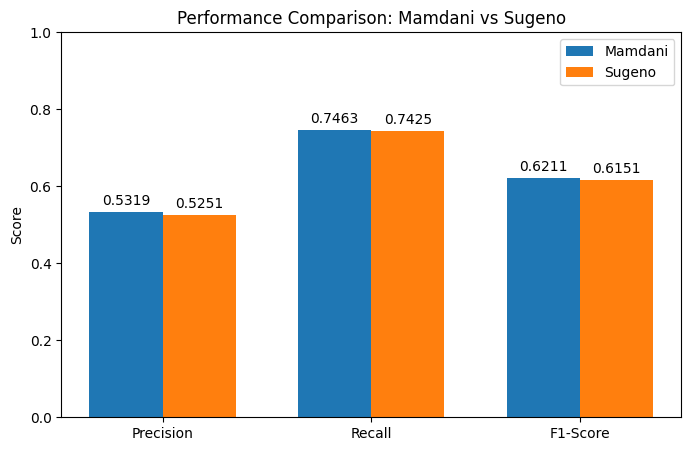

In [19]:
true_labels = df['Outcome'].values

# --- Mamdani Evaluation ---
risk_outputs = []
for _, row in df.iterrows():
    mamdani_sim.input['glucose'] = row['Glucose']
    mamdani_sim.input['bmi'] = row['BMI']
    mamdani_sim.input['bloodpressure'] = row['BloodPressure']
    mamdani_sim.compute()
    risk_outputs.append(mamdani_sim.output['risk'])
risk_outputs = np.array(risk_outputs)

best_f1 = 0
best_threshold = 0
best_precision = 0
best_recall = 0

# Find best threshold for Mamdani by maximizing F1 score
for threshold in np.linspace(risk_outputs.min(), risk_outputs.max(), 100):
    preds = (risk_outputs >= threshold).astype(int)
    precision = precision_score(true_labels, preds)
    recall = recall_score(true_labels, preds)
    f1 = f1_score(true_labels, preds)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold
        best_precision = precision
        best_recall = recall

# --- Sugeno Evaluation ---
sugeno_scores = []
for _, row in df.iterrows():
    score = evaluate_rules(row['Glucose'], row['BMI'], row['BloodPressure'])
    sugeno_scores.append(score)
sugeno_scores = np.array(sugeno_scores)

best_sugeno_f1 = 0
best_sugeno_threshold = 0
best_sugeno_precision = 0
best_sugeno_recall = 0

# Find best threshold for Sugeno by maximizing F1 score
for threshold in np.linspace(sugeno_scores.min(), sugeno_scores.max(), 100):
    preds = (sugeno_scores >= threshold).astype(int)
    precision = precision_score(true_labels, preds)
    recall = recall_score(true_labels, preds)
    f1 = f1_score(true_labels, preds)
    if f1 > best_sugeno_f1:
        best_sugeno_f1 = f1
        best_sugeno_threshold = threshold
        best_sugeno_precision = precision
        best_sugeno_recall = recall

# Print results
print(f"[Mamdani] Best Threshold: {best_threshold:.4f}")
print(f"[Mamdani] Precision: {best_precision:.4f}")
print(f"[Mamdani] Recall: {best_recall:.4f}")
print(f"[Mamdani] F1 Score: {best_f1:.4f}")

print(f"[Sugeno] Best Threshold: {best_sugeno_threshold:.4f}")
print(f"[Sugeno] Precision: {best_sugeno_precision:.4f}")
print(f"[Sugeno] Recall: {best_sugeno_recall:.4f}")
print(f"[Sugeno] F1 Score: {best_sugeno_f1:.4f}")

# --- Bar chart for comparison ---
metrics = ['Precision', 'Recall', 'F1-Score']
mamdani_scores = [best_precision, best_recall, best_f1]
sugeno_scores = [best_sugeno_precision, best_sugeno_recall, best_sugeno_f1]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width/2, mamdani_scores, width, label='Mamdani')
rects2 = ax.bar(x + width/2, sugeno_scores, width, label='Sugeno')

ax.set_ylabel('Score')
ax.set_title('Performance Comparison: Mamdani vs Sugeno')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim([0, 1])
ax.legend()

# Add text labels on bars
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.4f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()